In [1]:
from src.dataset.data_preparation import prepare_pipeline_data
from config.base import RAW_DATA_PATH

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
train_df, test_df, _, _, _ = prepare_pipeline_data(
    data_path=RAW_DATA_PATH, 
    apply_transformations=True)
# merge train_df and test_df
# df = pd.concat([train_df, test_df])
df = train_df


📊 STEP 1: DATA PREPARATION
----------------------------------------
Loading and preparing data...
Applying transformations to non-stationary exogenous features...
  - Feature 'btc_sma_5' is non-stationary (p-value: 0.8936). Applying transformation.
    - Box-Cox lambda (0.20) suggests log transform. Applying log returns.
  - Feature 'btc_ema_5' is non-stationary (p-value: 0.8997). Applying transformation.
    - Box-Cox lambda (0.20) suggests log transform. Applying log returns.
  - Feature 'btc_sma_14' is non-stationary (p-value: 0.9794). Applying transformation.
    - Box-Cox lambda (0.21) suggests log transform. Applying log returns.
  - Feature 'btc_ema_14' is non-stationary (p-value: 0.8408). Applying transformation.
    - Box-Cox lambda (0.21) suggests log transform. Applying log returns.
  - Feature 'btc_sma_21' is non-stationary (p-value: 0.9189). Applying transformation.
    - Box-Cox lambda (0.21) suggests log transform. Applying log returns.
  - Feature 'btc_ema_21' is non-s

In [14]:
cross_market_features = [
    # Commodities
    'Gold_Price', 'Gold_Share', 'Gold_Volatility',
    'Oil_Crude_Price', 'Oil_Brent_Price', 'Oil_Volatility',
    
    # Stock Indices
    'DJI', 'GSPC', 'IXIC', 'NYFANG',
    
    # Market Indicators
    'CBOE_Volatility', 'EM_ETF',
    
    # Currency
    'DXY', 'EURUSD'
]


Top 3 Positive Correlations:
IXIC: 0.251


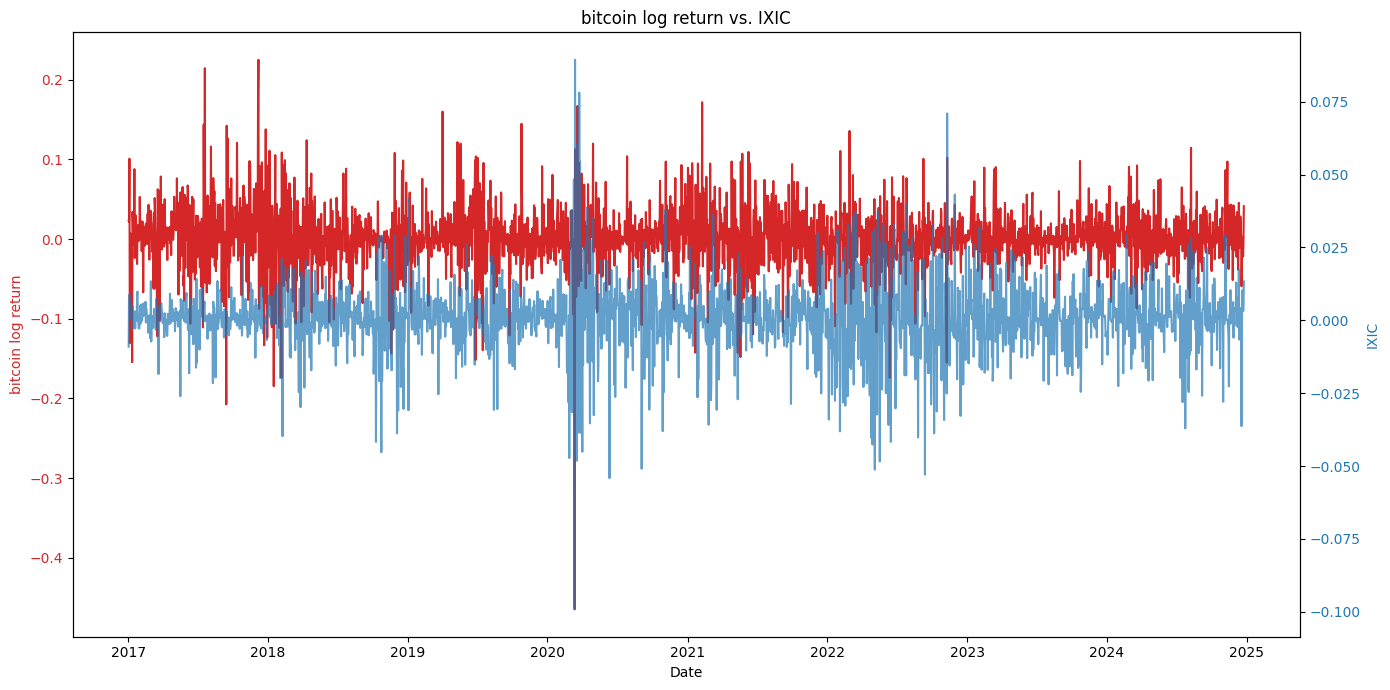

GSPC: 0.240


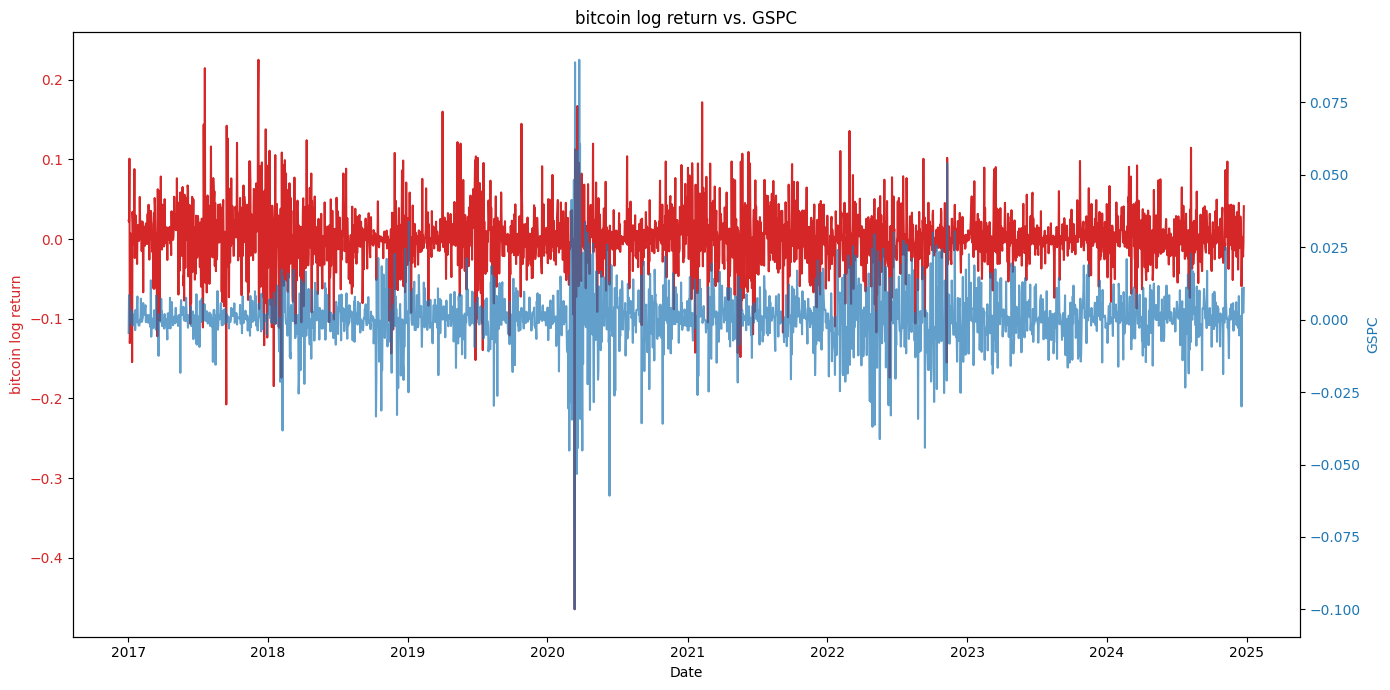

NYFANG: 0.225


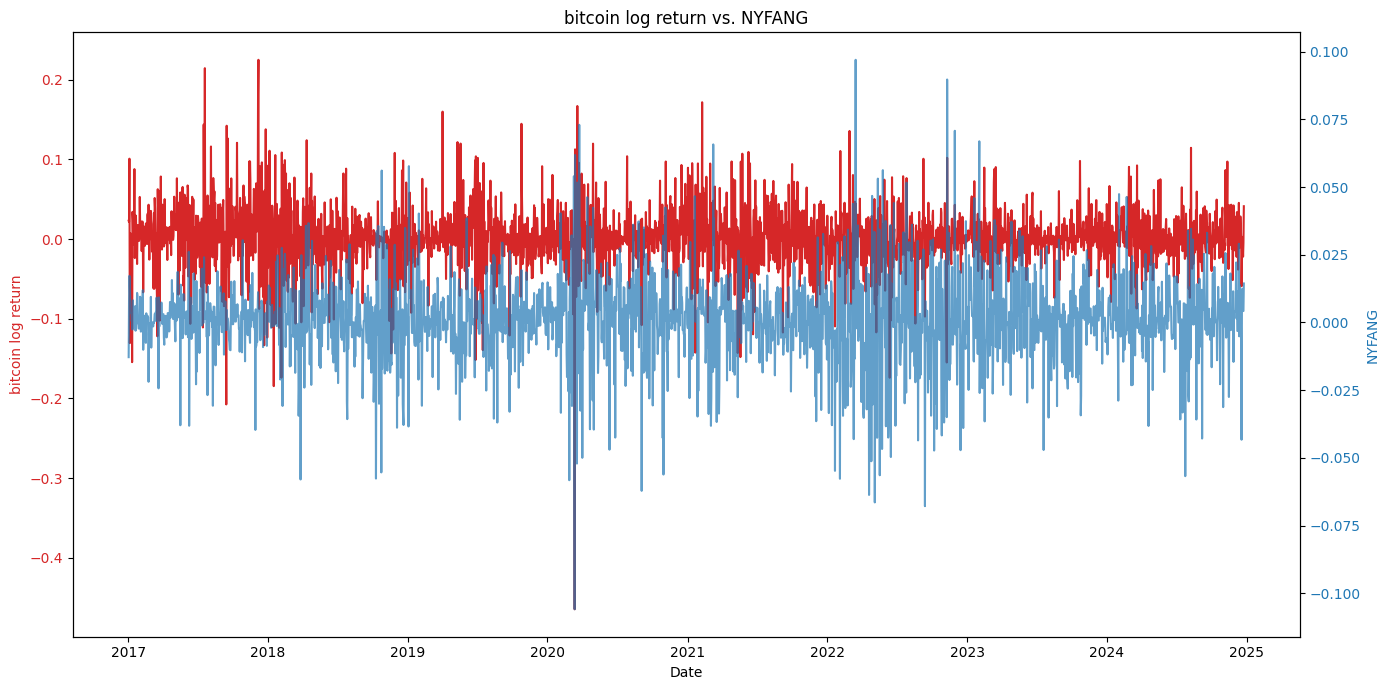

In [21]:
import matplotlib.dates as mdates

correlations_with_target = df[cross_market_features + ['y']].corr()['y'].sort_values(ascending=False)

def plot_feature_vs_target(df, feature_name, target_name='btc_close'):
    """Plots a feature and the target on dual axes or normalized with year-only x-axis formatting."""
    if feature_name not in df.columns or target_name not in df.columns or 'ds' not in df.columns:
        print(f"Warning: {feature_name}, {target_name} or 'ds' not in DataFrame columns.")
        return
    
    # Convert date column to datetime
    dates = pd.to_datetime(df['ds'])

    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('bitcoin log return', color=color)
    ax1.plot(dates, df[target_name], color=color, label='bitcoin log return')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(feature_name, color=color)
    ax2.plot(dates, df[feature_name], color=color, label=feature_name, alpha=0.7)
    ax2.tick_params(axis='y', labelcolor=color)

    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.xticks(rotation=45)
    plt.title(f'bitcoin log return vs. {feature_name}')
    fig.tight_layout()
    plt.show()

top_pos = correlations_with_target.nlargest(4).index.tolist()
top_neg = correlations_with_target.nsmallest(3).index.tolist()

target_variable = 'y'

print("\nTop 3 Positive Correlations:")
for feature in top_pos:
    if feature != target_variable:
        print(f"{feature}: {correlations_with_target[feature]:.3f}")
        plot_feature_vs_target(df, feature, target_variable)


Top 3 Negative Correlations:
DXY: -0.098


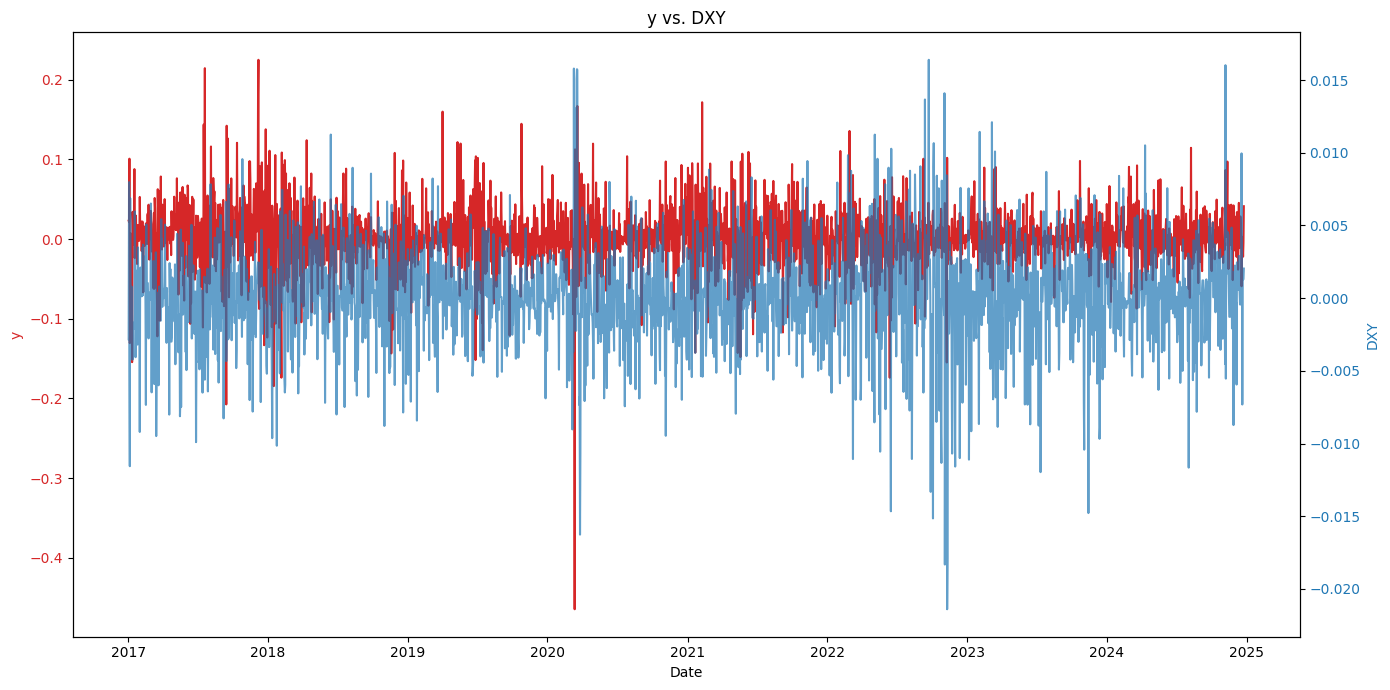

CBOE_Volatility: -0.059


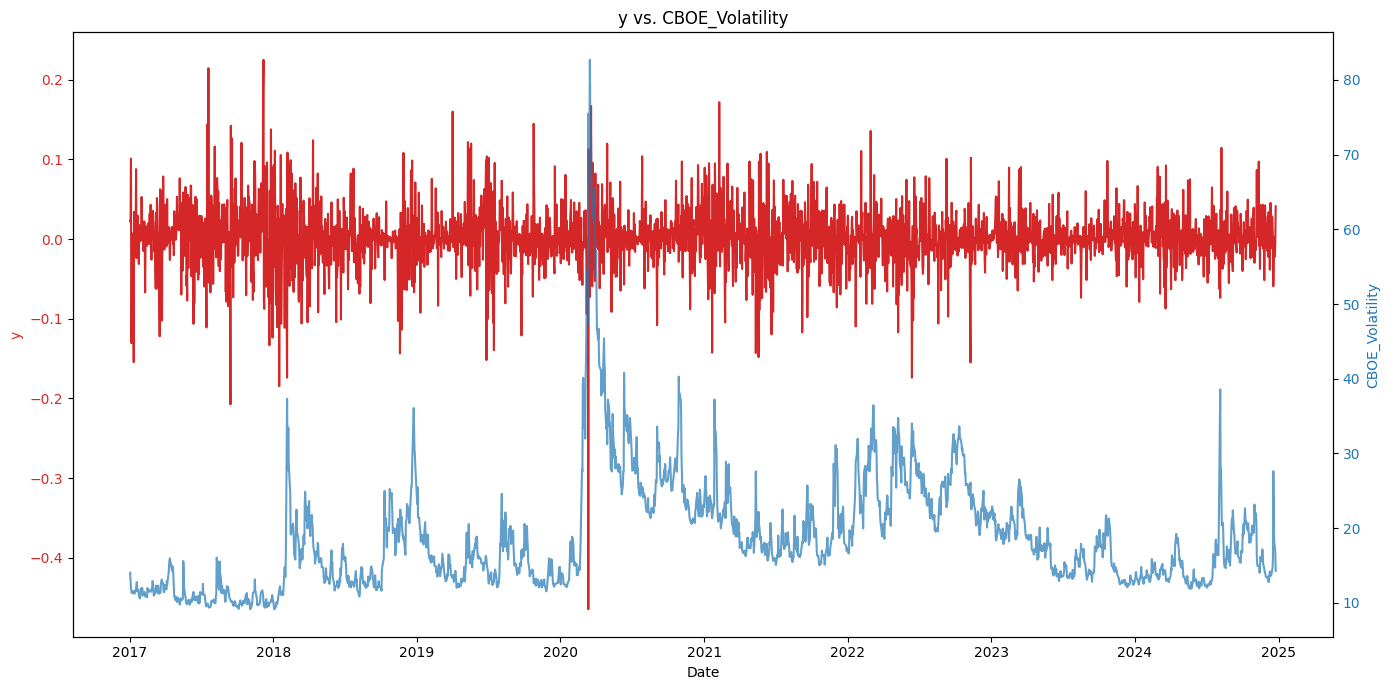

EURUSD: -0.013


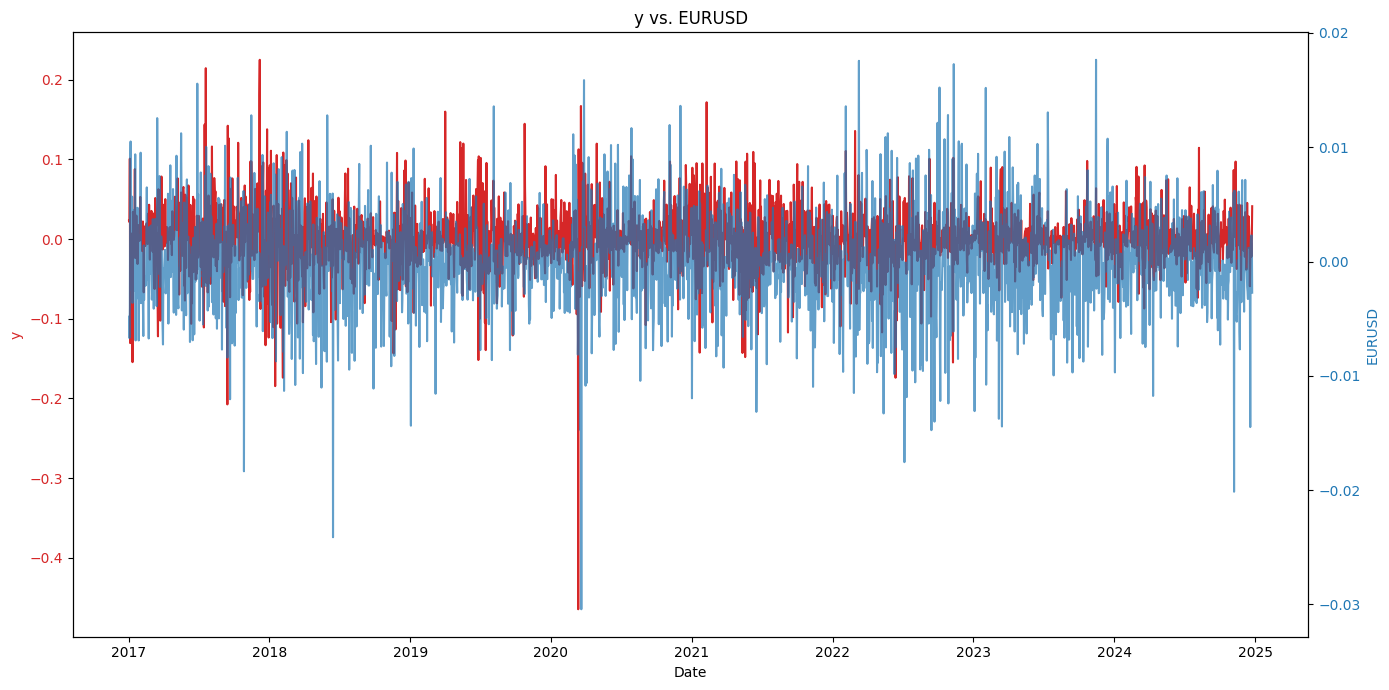

In [19]:
print("\nTop 3 Negative Correlations:") 
for feature in top_neg:
    if feature != target_variable:
        print(f"{feature}: {correlations_with_target[feature]:.3f}")
        plot_feature_vs_target(df, feature, target_variable)